<a href="https://colab.research.google.com/github/el-moudni-hicham/youtube-comments-exploring-nlp/blob/main/youtube_spam_ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Exploring Youtube Comments with NLP***

---





# Data Analysis

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Read dataset
shakira_df = pd.read_csv("Youtube05-Shakira.csv")

In [6]:
shakira_df.sample(5)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
263,_2viQ_Qnc6_Z85BMDurr0H0sdfTiCwy1hAg5aytbkWg,Trulee IsNotAmazing,2013-09-07T14:18:22.601000,Beautiful song beautiful girl it works,0
210,_2viQ_Qnc69JZ1f3TJQWKMLhmdP0inDDPwOvzMQiFjE,Su Xianfeng,2013-10-05T11:54:10.192000,subscribe now!!!!!! love the song!!!!!! love f...,1
302,_2viQ_Qnc6-NqqHR40AwZGnQV7in6y6YrSbMW9wRZXM,Adam Whitney,2013-08-25T03:56:24.363000,Hello everyone :) I know most of you probably ...,1
65,z133xfvjenv5vfr0o22nhfrawr2ve3gp004,Lala Ella,2015-05-24T14:16:59.411000,OMG LISTEN TO THIS ITS SOO GOOD!! :D﻿,0
358,_2viQ_Qnc6-jk58CPwBnqfbM6oByJH5oPvCtKecLQyo,Shadrach Grentz,2013-07-14T03:11:20.243000,Hey Music Fans I really appreciate all of you ...,1


In [7]:
shakira_df.CLASS.value_counts()

0    196
1    174
Name: CLASS, dtype: int64

In [8]:
# Null values
shakira_df.isna().sum()

COMMENT_ID    0
AUTHOR        0
DATE          0
CONTENT       0
CLASS         0
dtype: int64

In [9]:
shakira_df[shakira_df['CLASS'] == 1].isna().sum()

COMMENT_ID    0
AUTHOR        0
DATE          0
CONTENT       0
CLASS         0
dtype: int64

In [10]:
# Add commants length
shakira_df['length'] = shakira_df['CONTENT'].apply(len)

In [11]:
shakira_df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,length
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0,10
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0,13
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0,13
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0,86
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0,29
...,...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0,58
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0,93
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0,3
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0,23


In [12]:
shakira_df[shakira_df['CLASS'] == 1 ].length.mean()

196.33908045977012

In [13]:
shakira_df[shakira_df['CLASS'] == 0 ].length.mean()

31.321428571428573

In [14]:
min_length = shakira_df.length.min()
max_length = shakira_df.length.max()

print('\033[91m' + 'commants min length : ', min_length)

print('\033[92m' + 'commants max length : ', max_length)

commants min length :  2
commants max length :  1125


In [15]:
shakira_df['length'].value_counts()

10     11
14     11
11     11
13     10
9      10
       ..
487     1
499     1
162     1
62      1
93      1
Name: length, Length: 152, dtype: int64

<Axes: >

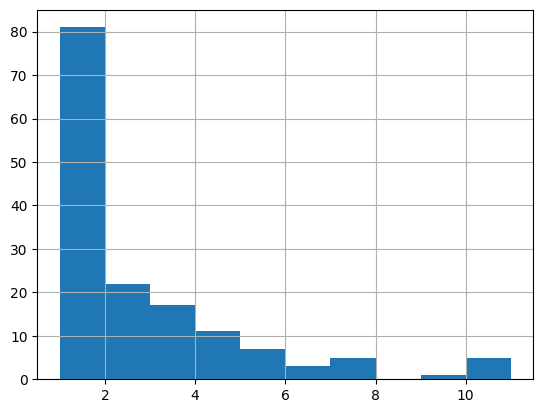

In [16]:
shakira_df['length'].value_counts().hist()

In [17]:
shakira_df[shakira_df['length'] == 11]

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,length
61,z134ufywgmy5yny1223bvdkxvleyjj2ik04,Oreoluwa Ajjayi,2015-05-24T16:05:33.401000,I love you﻿,0,11
95,z13aznjg2ojwjlknm23yjbt4uniuepuxs04,Dunrell Pinder,2015-05-23T02:57:54.433000,i love her﻿,0,11
103,z13ldttruqm1x1wsz23qcdlq4saefnkew,Wiki Smolinska,2015-05-22T09:47:17.977000,Cool song ﻿,0,11
105,z13oxvzqrzvyit00322jwtjo2tzqylhof04,Octavia W,2015-05-22T02:33:26.041000,Waka waka ﻿,0,11
211,_2viQ_Qnc68fX3dYsfYuM-m4ELMJvxOQBmBOFHqGOk0,tyler sleetway,2013-10-05T00:57:25.078000,so beutiful,0,11
212,_2viQ_Qnc68fX3dYsfYuM-m4ELMJvxOQBmBOFHqGOk0,tyler sleetway,2013-10-05T00:57:25.078000,so beutiful,0,11
223,_2viQ_Qnc6_JXmouLzw0-ItjbZCiPZjIwo__lIyDsj8,5000palo,2013-10-04T14:21:59.312000,Shakira :-*,0,11
234,_2viQ_Qnc68MKhLnK71z12gu878i_A0sdfmpA0RvgOE,5000palo,2013-10-02T13:45:33.782000,Shakira :-*,0,11
243,_2viQ_Qnc6_eGfHB415UkNWBszO-GzLm9_Q0_qWsNLI,annabelle dalal,2013-10-02T03:50:46.921000,She is good,0,11
264,_2viQ_Qnc68mfmp-D4hvnrhJa3Z4I1G4FbP0hvk2rA4,5000palo,2013-09-07T13:36:28.059000,Shakira :-*,0,11


# Data Cleaning

In [18]:
import string
punctuation = string.punctuation

In [19]:
# function to remove punctuation
def remove_punctuation(comment):
  no_punct = [char for char in comment if char not in punctuation]
  return "".join(no_punct)

In [20]:
text = "I don't ?  like ! some other % people"
remove_punctuation(text)

'I dont   like  some other  people'

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
# function to remove stop words
def remove_stopwords(comment):
  no_stopwords = [word for word in comment.split() if word.lower() not in english_stopwords]
  return " ".join(no_stopwords)

In [24]:
text = "I don't like some other people"
remove_stopwords(text)

'like people'

In [25]:
def clean_comments(comment):
  comment = remove_punctuation(comment)
  comment = remove_stopwords(comment)
  return comment

In [26]:
text = "I don't ?  like ! some other % people"
clean_comments(text)

'dont like people'

# Tokenization, Stemming and Lemmatization

In [27]:
# Tokenization function
def tokenizer(commant):
    return commant.split()

In [28]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Lemmatization function
def lemmatizer(commant):
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(mot) for mot in commant]
  return " ".join(lemmatized_tokens)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [29]:
import spacy

# Lemmatization function 2
def spacy_lemmatizer(commant):
  load_model = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
  spacy_sent = load_model(commant)
  lemmatized_tokens = [token.lemma_ for token in spacy_sent]
  return " ".join(lemmatized_tokens)

In [30]:
text = 'im getting popular fast because i rap with meaning'
#text = tokenizer(text)
spacy_lemmatizer(text)

'I m get popular fast because I rap with meaning'

In [31]:
from nltk.stem.porter import PorterStemmer

# Stemming function
def stemmer(commant):
  porter = PorterStemmer()
  stemmed = [porter.stem(word) for word in commant]
  return " ".join(stemmed)

In [33]:
text = 'im getting popular fast because i rap with meaning'
text = tokenizer(text)
stemmer(text)

'im get popular fast becaus i rap with mean'

In [34]:
# Commants peprocessing function
def preprocess_comments(comment):
  comment = clean_comments(comment)
  comment = spacy_lemmatizer(comment)
  comment = tokenizer(comment)
  comment = stemmer(comment)
  return comment

In [35]:
text = 'im getting popular fast because i rap with meaning'
preprocess_comments(text)

'i m get popular fast rap mean'

In [36]:
no_spam = shakira_df[shakira_df.CLASS == 0].CONTENT
spam = shakira_df[shakira_df.CLASS == 1].CONTENT

In [37]:
no_spam_clean = no_spam.apply(preprocess_comments)
spam_clean = spam.apply(preprocess_comments)

In [38]:
no_spam_clean = " ".join(no_spam_clean)
spam_clean = " ".join(spam_clean)

In [39]:
!pip install wordcloud

In [40]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def wordcloud(commants):
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="gray", random_state=9).generate(commants)

  plt.figure(figsize = (10,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

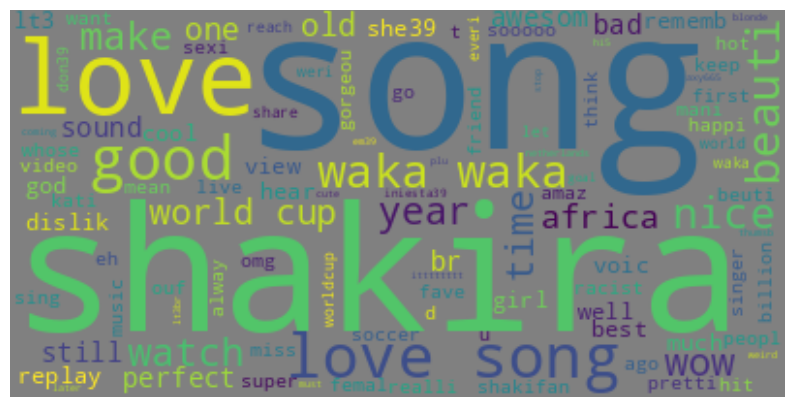

In [41]:
wordcloud(no_spam_clean)

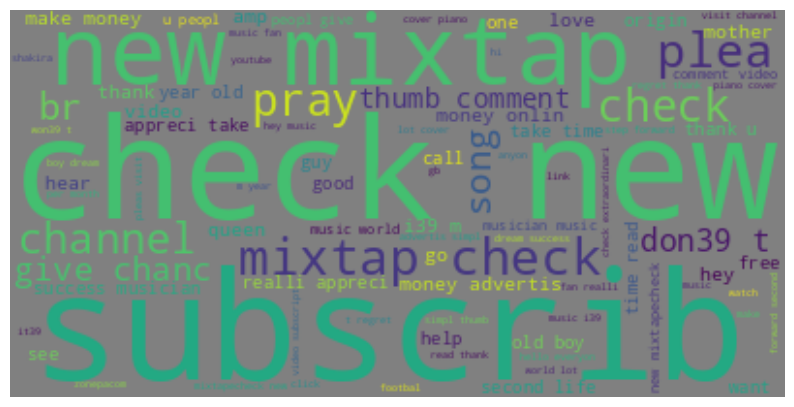

In [42]:
wordcloud(spam_clean)

# Concatenate all datasets

In [43]:
shakira_df = pd.read_csv('Youtube05-Shakira.csv').replace({'\ufeff': ''}, regex=True)
psy_df = pd.read_csv('Youtube01-Psy.csv').replace({'\ufeff': ''}, regex=True)
katy_df = pd.read_csv('Youtube02-KatyPerry.csv').replace({'\ufeff': ''}, regex=True)
lmfao_df = pd.read_csv('Youtube03-LMFAO.csv').replace({'\ufeff': ''}, regex=True)
eminem_df = pd.read_csv('Youtube04-Eminem.csv').replace({'\ufeff': ''}, regex=True)

In [44]:
# Concatenate all comments
all_comments = pd.concat([psy_df, katy_df, lmfao_df, eminem_df, shakira_df], ignore_index=True)

In [45]:
all_comments

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .,1
...,...,...,...,...,...
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


In [46]:
all_contents = all_comments.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis =1)

In [47]:
all_contents.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^,1
4,watch?v=vtaRGgvGtWQ Check this out .,1


In [48]:
all_contents

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^,1
4,watch?v=vtaRGgvGtWQ Check this out .,1
...,...,...
1951,I love this song because we sing it at Camp al...,0
1952,I love this song for two reasons: 1.it is abou...,0
1953,wow,0
1954,Shakira u are so wiredo,0


In [49]:
all_contents.drop_duplicates(inplace=True)

In [50]:
all_contents

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^,1
4,watch?v=vtaRGgvGtWQ Check this out .,1
...,...,...
1950,well done shakira,0
1951,I love this song because we sing it at Camp al...,0
1952,I love this song for two reasons: 1.it is abou...,0
1954,Shakira u are so wiredo,0


# Text Vectorization

## Count Vectorizer

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

c_vectorizer = CountVectorizer(analyzer = preprocess_comments)
comment_countvectorized = c_vectorizer.fit_transform(all_contents['CONTENT'])

In [52]:
len(c_vectorizer.get_feature_names_out())

229

## TF-IDF Vectorizer

In [52]:
###

# Modeling

In [53]:
labels = all_contents['CLASS'].values

In [54]:
X = comment_countvectorized
y = labels

In [55]:
X.shape

(1749, 229)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 9)

In [57]:
X_train.shape

(1399, 229)

In [72]:
from sklearn.naive_bayes import BernoulliNB

BNB_classifier = BernoulliNB(alpha = 0.01)
BNB_classifier.fit(X_train, y_train)

BernoulliNB(alpha=0.01)

In [73]:
BNB_classifier.score(X_test, y_test)

0.7714285714285715

In [74]:
print(BNB_classifier.classes_)

[0 1]


In [75]:
new_comment = ['I love watching the videos from this channel. Hope you notice me.', 'Male anti balding cream']
new_comment_counts = c_vectorizer.transform(new_comment)

predict = BNB_classifier.predict_proba(new_comment_counts)

for text, label in zip(new_comment, predict):
    print('%r => %s' % (text, label))

'I love watching the videos from this channel. Hope you notice me.' => [0.96237279 0.03762721]
'Male anti balding cream' => [0.99170605 0.00829395]
